# CreateBathymetryFromBody

This jupyter-notebook is used to show how ExoCcycle classes, functions, and methods are used to generate bathymetry models (as shown) and carbon cycle model parameters.

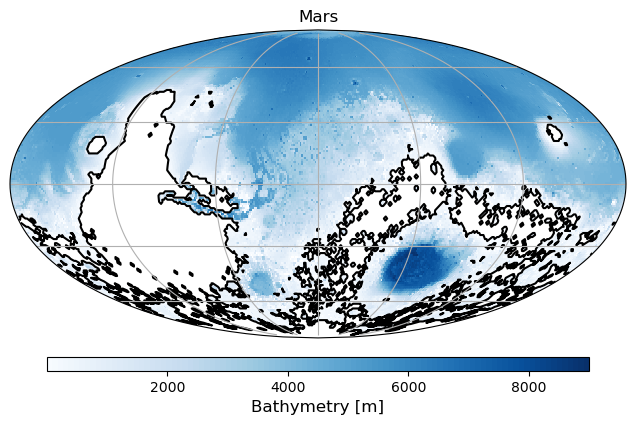

In [ ]:
# Import necessary libraries
import ExoCcycle as EC
import matplotlib as mpl
import numpy as np

# Create bathymetry object with body=... attributes
# Try setting body='mars' | 'earth' | 'moon', 'Venus'
marsBathy = EC.Bathymetry.BathyMeasured(body='mars')

# Download topography model (note that is must only be done once per body).
# NOTE: UNCOMMENT THIS SECTION TO DOWNLOAD TOPOGRAPHY MODEL
# marsBathy.getTopo("/home/bogumil/Documents/External_fids/ExoCcycle-workspace",
#                   verbose=False);

# Read topography. This method will generate a topography model netCDF4 file with 
# new_resolution, in degrees. Note that the generated topography model will be 
# cell registered (All calculations from here on out are in cell registered to
# simplify codes and reduce data loss on conversions).
marsBathy.readTopo("/home/bogumil/Documents/External_fids/ExoCcycle-workspace",
                   new_resolution=1,
                   verbose=False);

# Generate a bathymetry model base on a set of input methods and properties. The setSeaLelvel
# method has multiple ways to fill topography with oceans. The two currently implemented at
# the time of this JN creation are as follows:
#     1) basinVolume : An option to define bathymetry by flooding topography with
#                      basinVolume['uncompactedVol'] amount of ocean water, in m3.
#     2) OceanArea : Option to define bathymetry by flooding topography until
#                    oceanArea['area'], decimal percent, of global area is covered
#                    with oceans.
# 
# Here, I use the OceanArea constraint and block the basinVolume constraint with comments.
# 
marsBathy.setSeaLevel(basinVolume = {"on":False, 'uncompactedVol':None},
                      oceanArea = {"on":True, "area":0.7},
                      isostaticCompensation = {"on":False}, verbose=False)

# Note that in this basinVolume example the uncompactedVol was set to the oceanArea
# bathymetry model's VOC, where oceanArea = {"on":True, "area":0.7}. 
#
# marsBathy.setSeaLevel(basinVolume = {"on":True, 'uncompactedVol':3.299187952154623e+17},
#                       oceanArea = {"on":False, "area":0.7},
#                       isostaticCompensation = {"on":False}, verbose=False)


# Save bathymetry model as netCDF4. Note that models will be saved under the same root folder
# that was supplied to the readTopo(...) method.
# 
# only the bathymetry array is saved in this file. Other relevant values are represented
# as vectors (e.g., lat, lon, area-weights, global bathymetery distributions, etc) or
# attributes (e.g., VOC, AOC, high latitude cutoff, etc).
# 
marsBathy.saveBathymetry()

#
# To see a full set of stored netCDF4 values, the user can uncomment the code below
# 
# marsBathy.readBathymetry()
# print(marsBathy.bathync)
# print(marsBathy.bathync.variables)

# Plot bathymetry model
blues_cm = mpl.colormaps['Blues'].resampled(100)
EC.utils.plotGlobal(marsBathy.lat, marsBathy.lon, marsBathy.bathymetry,
                    outputDir = marsBathy.data_dir+"/bathymetries/{}".format(marsBathy.model),
                    fidName = "{}-setSeaLevel_Area0p7.png".format(marsBathy.model),
                    cmapOpts={"cmap":blues_cm,
                              "cbar-title":"cbar-title",
                              "cbar-range":[np.min(np.min(marsBathy.elev)),np.max(np.max(marsBathy.elev))]},
                    pltOpts={"valueType": "Bathymetry",
                             "valueUnits": "m",
                             "plotTitle":"{}".format(marsBathy.model),
                             "plotZeroContour":True},
                    savePNG = True)

